In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()



train_images, test_images = train_images / 255.0, test_images / 255.0




train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [8]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Specify input shape only in the first Conv2D layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Senth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Save the model (optional)
model.save('simple_cnn_model.h5')

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.3149 - loss: 1.8470 - val_accuracy: 0.5416 - val_loss: 1.2988
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.5455 - loss: 1.2748 - val_accuracy: 0.5818 - val_loss: 1.1578
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.6092 - loss: 1.1113 - val_accuracy: 0.6376 - val_loss: 1.0427
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.6506 - loss: 0.9985 - val_accuracy: 0.6314 - val_loss: 1.0363
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.6786 - loss: 0.9256 - val_accuracy: 0.6828 - val_loss: 0.9054
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6683 - loss: 0.9475


Test accuracy: 0.6673


In [15]:
# Function to predict the class of an input image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
def predict_image(image_path):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    # CIFAR-10 class names
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    
    print(f"Predicted class: {class_names[predicted_class]}")
    
    # Display the image
    plt.imshow(img_array[0])
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: ship


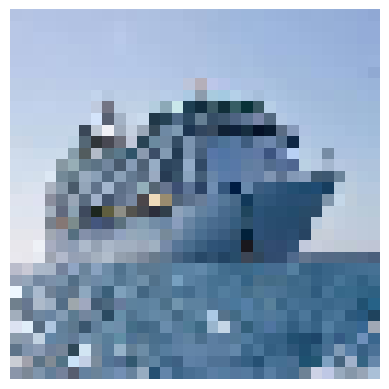

In [17]:
image_path = "C:/Users/Senth/OneDrive/Desktop/download.jpeg"  # Replace with the path to your input image
predict_image(image_path)